Initialization

Welcome to the first assignment of "Improving Deep Neural Networks".

Training your neural network requires specifying an initial value of the weights. A well chosen initialization method will help learning.

If you completed the previous course of this specialization, you probably followed our instructions for weight initialization, and it has worked out so far. But how do you choose the initialization for a new neural network? In this notebook, you will see how different initializations lead to different results.

A well chosen initialization can:

Speed up the convergence of gradient descent
Increase the odds of gradient descent converging to a lower training (and generalization) error
To get started, run the following cell to load the packages and the planar dataset you will try to classify.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


%matplotlib inline

In [4]:
def load_dataset():
    with h5py.File('F:/chirps/catvnoncat/train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('F:/chirps/catvnoncat/test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [5]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0], it's a 'non-cat' picture.


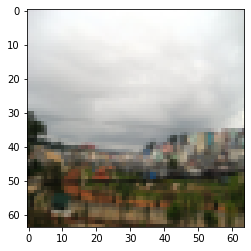

In [7]:
# Example of a picture
index = 17
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

In [8]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [9]:
nx = train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3]
m = train_set_x_orig.shape[0]

In [10]:
nx

12288

In [12]:
##Standardising the dataset with training mean and std

mean_train = np.mean(train_set_x_orig, axis = 0, keepdims = True)
std_train = np.std(train_set_x_orig, axis = 0, keepdims = True)
train_set_x = (train_set_x_orig - mean_train) / std_train
test_set_x = (test_set_x_orig - mean_train) / std_train

In [15]:
std_train.shape

(1, 64, 64, 3)

In [16]:
train_set_x = train_set_x.reshape(nx,m)
test_set_x = test_set_x.reshape(nx,50)

In [18]:
test_set_x.shape

(12288, 50)

In [33]:
##Defining Activation functions 

def tanh(z):
    temp = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    return temp;

def sigmoid(z):
    temp = 1/(1+np.exp(-z))
    return temp;

def leaky_relu(z):
    temp = (0.01*z)*(z<0)+z*(z>=0)
    return temp

def relu(z):
    temp = np.maximum(0,z)
    return temp

In [34]:
## Derivatives of Activation function

def grad_tanh(z):
    temp = 1 - tanh(z)*tanh(z)
    return temp

def grad_sigmoid(z):
    temp = sigmoid(z)*(1-sigmoid(z))
    return temp

def grad_leaky_relu(z):
    temp = 0.01*(z<0)+1*(z>=0)
    return temp

def grad_relu(z):
    temp = 0*(z<0)+1*(z>=0)
    return temp

In [35]:
## Initialize parameters as total number of layers
def initialize_param(L,nx,m):
    x = []
    y = [0]
    x.append(nx)
    for i in range(L):
        x.append(input())
        y.append(input())
    return L, x, m, y

In [36]:
def parameters(L,x):
    w = [0]
    b = [0]
    for i in range(1,L+1):
        temp1 = np.random.randn(int(x[i-1]),int(x[i]))*0.01
        w.append(temp1)
        temp2 = np.zeros((int(x[i]),1))
        b.append(temp2)
        
    return w,b

In [37]:
##Forward Propagation step
def fwd_prop(L, w, b, training_x, y):
    z = [0]
    a = []
    a.append(training_x)
    for i in  range(1,L+1):
        temp1 = np.dot(w[i].T,a[i-1])+b[i]
        z.append(temp1)
        if(i!=L):
            temp3 = relu(z[i])
            
        
        else: 
            temp3 = sigmoid(z[i])
        a.append(temp3)
        
    return a,z

In [38]:
## Calculating cost funtion
def cost_fn(Y, a, m, L, lambdA, w):
    
    temp =  -1*(Y*np.log(a[L])+(1-Y)*np.log(1-a[L]))
    cost = np.sum(temp)/m + (lambdA / 2*m)*np.dot(w[L],w[L].T)
    
    return cost

In [39]:
##backpropagartion step
def back_prop(L, x, m, w, b, a, z, y, Y_train, lambdA):
    dz = [0]
    dw = [0]
    db = [0]
    
    for i in range(1,L+1):
        dz.append(np.zeros((z[i].shape)))
        dw.append(np.zeros((w[i].shape)))
        db.append(np.zeros((b[i].shape)))
        
    dz[L] = a[L] - Y_train
   
    for i in range(L,0,-1):
       
            
        dz[i-1] = np.dot(w[i], dz[i]) * grad_relu(z[i-1])
                
        dw[i] = (1/m)*np.dot(a[i-1], dz[i].T) + (lambdA/m)*w[i]
        db[i] = (1/m)*np.sum(dz[i], axis=1, keepdims=True)
        
        assert(dw[i].shape == w[i].shape)
        assert(db[i].shape == b[i].shape)
    return dz, dw, db

In [40]:
## updating the calculated parameters
##here alpha = learning rate
def update_param(w, b, dw, db, L, alpha):
    
    for i in  range(1,L+1):
        w[i] = w[i] - alpha * dw[i]
        b[i] = b[i] - alpha * db[i]
        
    return w, b

In [41]:
## defining the model to run
def model(X_train, Y_train, L, alpha, num_iterations, lambdA):
    L, x, m, y = initialize_param(3, X_train.shape[0], X_train.shape[1])
    w, b = parameters(L,x)
    
    for i in range(num_iterations):
        a, z = fwd_prop(L, w, b , X_train, y)
        cost = cost_fn(Y_train, a, m, L, lambdA, w)
        dz, dw, db = back_prop(L, x, m, w, b, a, z, y, Y_train, lambdA)
        w, b = update_param(w, b, dw, db, L, alpha)
        ##if(i%100==0):
            ##print("value of cost with",i, " iternation: ", cost)
        
       
    return w, b, cost

In [42]:
l_rate = [0.002]
cost_f = []
for i in range(12):
    w, b, cost = model(train_set_x, train_set_y, 3, l_rate[i], 3000, 0.4)
    print("Cost with learning rate= ", l_rate[i], " = ", cost )
    cost_f.append(cost)
    temp = l_rate[i]*2
    l_rate.append(temp)

5
r
3
r
1
s
Cost with learning rate=  0.002  =  [[0.64734081 0.646765   0.64717033]
 [0.646765   0.64677485 0.64676792]
 [0.64717033 0.64676792 0.64705119]]
f


KeyboardInterrupt: 